<a href="https://colab.research.google.com/github/mira-bot/ML/blob/main/GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

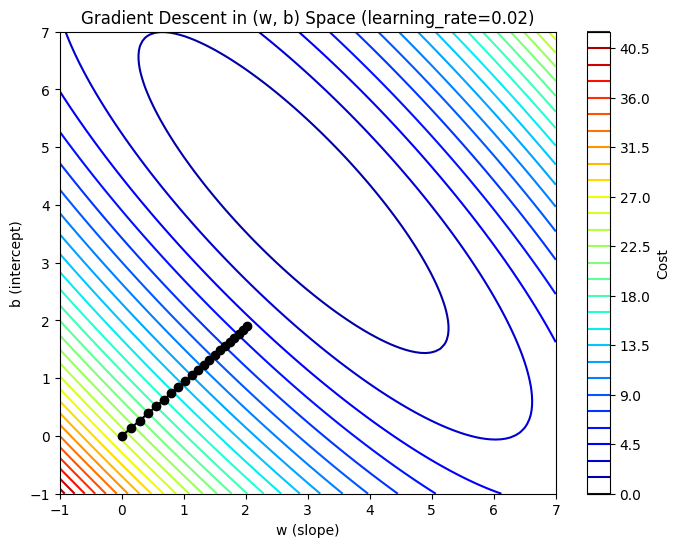

Final parameters after Gradient Descent:
  w = 2.0210, b = 1.9007
  Final cost = 5.0584


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------
# Generate a synthetic 1D regression dataset
# ---------------------------------------------------
np.random.seed(42)
X = 2 * np.random.rand(100, 1)      # 100 points, scaled between [0, 2]
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3X + noise

# ---------------------------------------------------
# Define the cost function and its gradients
# ---------------------------------------------------
def compute_cost(w, b, X, y):
    """
    Mean Squared Error (MSE) cost for linear regression:
      cost = (1 / 2m) * sum((w*X + b - y)^2)
    """
    m = len(X)
    predictions = w * X + b
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def compute_gradients(w, b, X, y):
    """
    Computes partial derivatives of the cost function w.r.t. w and b.
      dw = (1/m) * sum((w*X + b - y) * X)
      db = (1/m) * sum((w*X + b - y))
    """
    m = len(X)
    predictions = w * X + b
    dw = (1 / m) * np.sum((predictions - y) * X)
    db = (1 / m) * np.sum(predictions - y)
    return dw, db

# ---------------------------------------------------
# Implement gradient descent
# ---------------------------------------------------
def gradient_descent(X, y, w_init=0.0, b_init=0.0, learning_rate=0.02, n_iterations=20):
    w, b = w_init, b_init
    history = [(w, b)]  # keep track of (w,b) at each step for plotting

    for i in range(n_iterations):
        dw, db = compute_gradients(w, b, X, y)
        w -= learning_rate * dw
        b -= learning_rate * db
        history.append((w, b))

    return w, b, history

# ---------------------------------------------------
# Plot cost function contours in (w,b)-space
#    and overlay the gradient descent path
# since we are in a linear regression task, we use Mean Sqare Error
# ---------------------------------------------------

# we create a grid of (w, b) values
w_vals = np.linspace(-1, 7, 100)
b_vals = np.linspace(-1, 7, 100)
J_vals = np.zeros((len(b_vals), len(w_vals)))

for i, wv in enumerate(w_vals):
    for j, bv in enumerate(b_vals):
        J_vals[j, i] = compute_cost(wv, bv, X, y)

# we run gradient descent with a chosen learning rate, usually 0.02 (higher, overshooting, lower, longer to converge)
w_final, b_final, hist = gradient_descent(X, y, learning_rate=0.02, n_iterations=20)
ws = [p[0] for p in hist]
bs = [p[1] for p in hist]

# we plot the contour lines of the cost function
W, B = np.meshgrid(w_vals, b_vals)
plt.figure(figsize=(8, 6))
contour_levels = 30
plt.contour(W, B, J_vals, levels=contour_levels, cmap='jet')
plt.colorbar(label='Cost')

# overlay the gradient descent path
plt.plot(ws, bs, marker='o', color='black')
plt.title("Gradient Descent in (w, b) Space (learning_rate=0.02)")
plt.xlabel("w (slope)")
plt.ylabel("b (intercept)")
plt.show()

# ---------------------------------------------------
# Print final results
# ---------------------------------------------------
print("Final parameters after Gradient Descent:")
print(f"  w = {w_final:.4f}, b = {b_final:.4f}")
print(f"  Final cost = {compute_cost(w_final, b_final, X, y):.4f}")
